In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from seaborn import load_dataset
titanic=load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()
labels=['who','adult_male','deck','embark_town','alive','alone','class']
titanic1=titanic.drop(labels,axis=1)
titanic1
titanic1.isna().any()

survived    False
pclass      False
sex         False
age          True
sibsp       False
parch       False
fare        False
embarked     True
dtype: bool

In [5]:
tdf=titanic1.T
tdf

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
sibsp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
embarked,S,C,S,S,S,Q,S,S,S,C,...,S,S,S,S,Q,S,S,S,C,Q


In [6]:
titanic['age'].max()

80.0

In [7]:
titanic['age'].min()

0.42

In [8]:
bins=[0,5,19,25,40,80]
label=['Baby','Kid','Teen','Adult','Old']
titanic1['age']=pd.cut(titanic1['age'],bins=bins,labels=label)
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,Teen,1,0,7.2500,S
1,1,1,female,Adult,1,0,71.2833,C
2,1,3,female,Adult,0,0,7.9250,S
3,1,1,female,Adult,1,0,53.1000,S
4,0,3,male,Adult,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,13.0000,S
887,1,1,female,Kid,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,Adult,0,0,30.0000,C


In [9]:
print(pd.DataFrame(titanic1['age'].value_counts()))
ftdf=titanic1.fillna({'age':titanic1['age'].mode()[0]})
#print(ftdf)
#ftdf['age'].isnull().any()      

       age
Adult  263
Old    150
Teen   137
Kid    120
Baby    44


In [10]:
ftdf.isna().any()

survived    False
pclass      False
sex         False
age         False
sibsp       False
parch       False
fare        False
embarked     True
dtype: bool

In [11]:
ftdf['embarked'].unique()
ftdf['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
ftdf1=ftdf.fillna({'embarked':'C'})
ftdf1['embarked'].value_counts()

S    644
C    170
Q     77
Name: embarked, dtype: int64

In [13]:
ftdf[['pclass','survived']].groupby(['pclass']).sum().sort_values(by='survived')
ftdf[['pclass','survived']].value_counts()

pclass  survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

In [14]:
ftdf[['sex','survived']].value_counts()

sex     survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

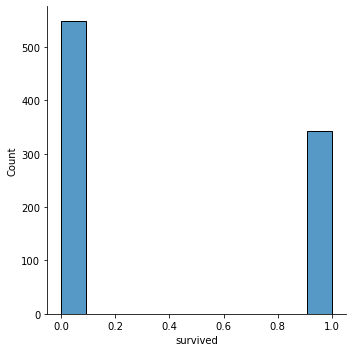

In [15]:
data=ftdf
sns.displot(data['survived'])

<AxesSubplot:xlabel='embarked', ylabel='survived'>

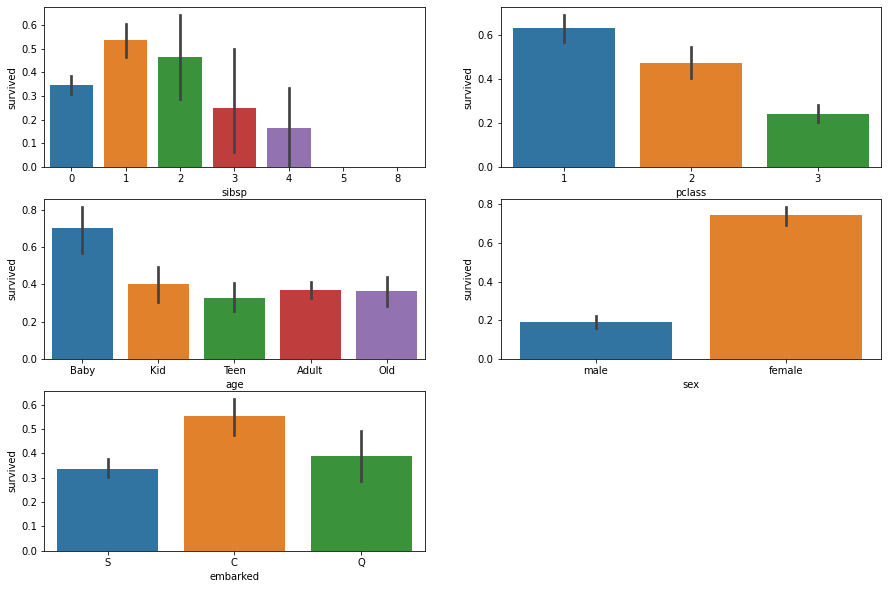

In [16]:
plot.figure(figsize=(15,10))
plot.subplot(321)
sns.barplot(x='sibsp',y='survived',data=data)
plot.subplot(322)
sns.barplot(x='pclass',y='survived',data=data)
plot.subplot(323)
sns.barplot(x='age',y='survived',data=data)
plot.subplot(324)
sns.barplot(x='sex',y='survived',data=data)
plot.subplot(325)
sns.barplot(x='embarked',y='survived',data=data)


<AxesSubplot:>

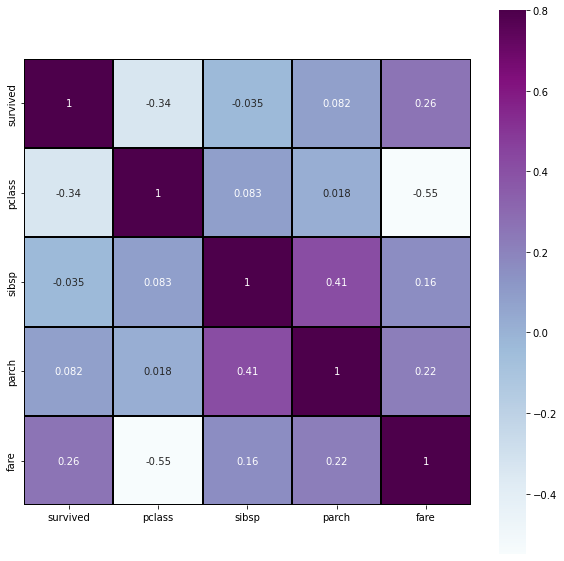

In [17]:
corr=ftdf.corr()
plot.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidths=.01,square=True,annot=True,cmap='BuPu',linecolor='black')


In [18]:
bins = [0, 7.9104, 14.4542, 31, 512.33]
labels = ['low', 'medium-low', 'medium', 'high']
ftdf['fare'] = pd.cut(ftdf["fare"], bins = bins, labels = labels)

In [19]:
dummies=['fare','age','embarked','sex']
dummy_data=pd.get_dummies(data[dummies])
data1=pd.concat([data,dummy_data],axis=1)
data1.drop(dummies,axis=1,inplace=True)
data1.isna().any()

survived           False
pclass             False
sibsp              False
parch              False
fare_low           False
fare_medium-low    False
fare_medium        False
fare_high          False
age_Baby           False
age_Kid            False
age_Teen           False
age_Adult          False
age_Old            False
embarked_C         False
embarked_Q         False
embarked_S         False
sex_female         False
sex_male           False
dtype: bool

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
x=data1.drop('survived',axis=1)
y=data1['survived']


In [27]:
svr=LinearSVR(epsilon=1, C=1, fit_intercept=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
accuracy_score(y_pred,y_test)


0.6791044776119403

In [113]:
#plot.scatter(x_train,y_pred,color='blue')
#plot.plot(x_train,y_pred,color='red')
#plot.xlabel('X')
#plot.ylabel('survived')